In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# 数据可视化工具

Gelman and Unwin 2011:

> A well-designed graph can display more information than a table of the same size, and more information than numbers embedded in text. Graphical displays allow and encourage direct visual comparisons.

+ **matplotlib**
+ **seaborn**
+ PyX
+ Bokeh
+ ...



## Matplotlib

    ipython notebook --pylab
    

    import matplotlib.pyplot as plt

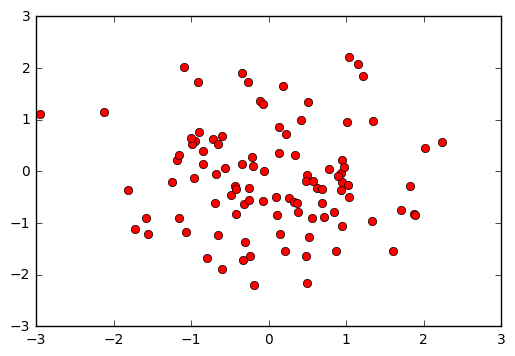

In [2]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'ro')

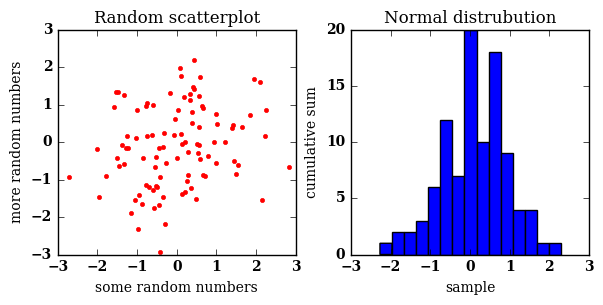

In [4]:
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout()
    plt.savefig("normalvars.png", dpi=150)

matplotlib是相对底层的绘图包，但是它也意味着灵活性。Pandas整合了matplotlib的功能，针对series以及DataFrame对象都提供了绘图功能.

## Pandas中的数据可视化

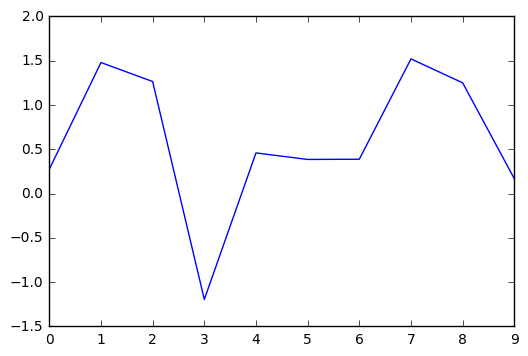

In [10]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

In [12]:
normals

0    0.275003
1    1.479715
2    1.265115
3   -1.194890
4    0.459281
5    0.385450
6    0.387933
7    1.520788
8    1.250539
9    0.168566
dtype: float64

In [8]:
np.random.normal?

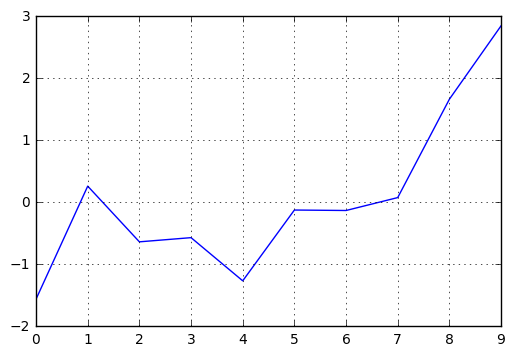

In [3]:
normals.cumsum().plot(grid=True)

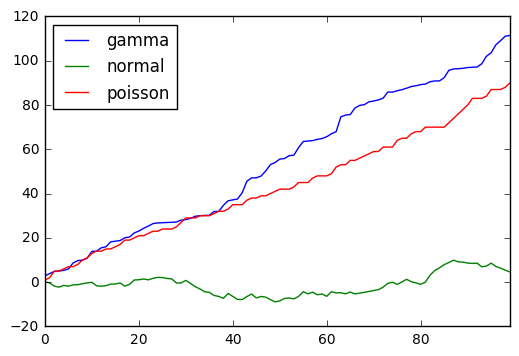

In [5]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

In [14]:
variables.cumsum(0)

,gamma,normal,poisson
0,2.843562,0.194310,1.0
1,3.874311,-0.346658,2.0
2,4.837087,-1.805144,5.0
3,5.038067,-2.243997,5.0
4,5.323618,-1.450304,6.0
...,...,...,...
95,103.573715,8.580250,87.0
96,107.185146,7.101803,87.0
97,109.057136,6.364944,87.0
98,111.093589,5.404420,88.0


In [13]:
variables.cumsum?

多个subplot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000006313748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000006409D30>], dtype=object)

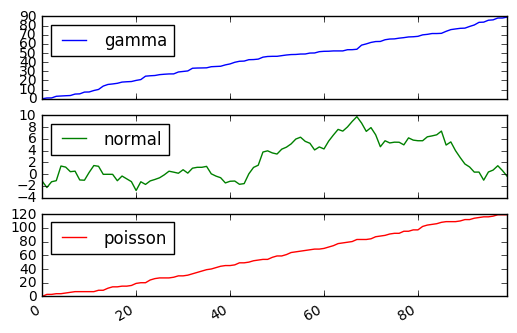

In [7]:
variables.cumsum(0).plot(subplots=True)

第二坐标轴

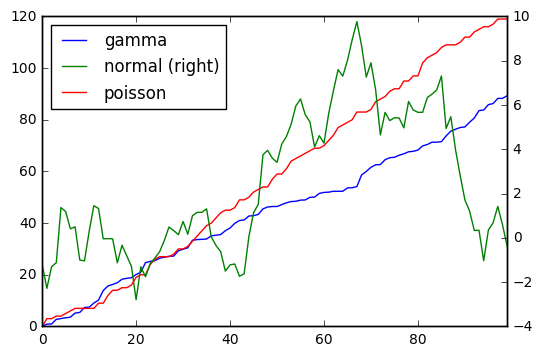

In [8]:
variables.cumsum(0).plot(secondary_y='normal')

直接使用`subplots`函数可以更好控制图形布局

In [45]:
plt.subplots?

In [23]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100),
                        'binomial':np.random.binomial(n=10,p=0.3,size=100)})

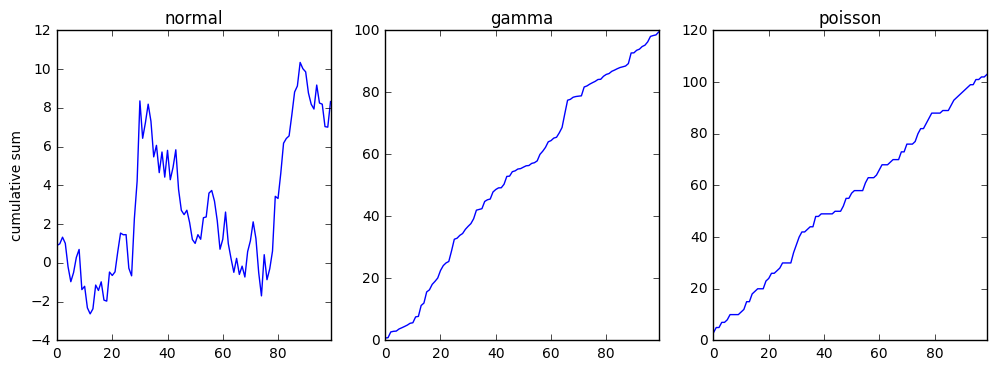

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

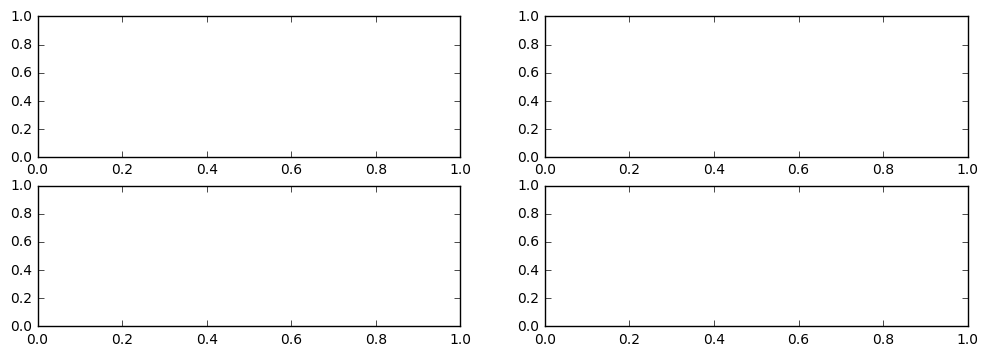

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))

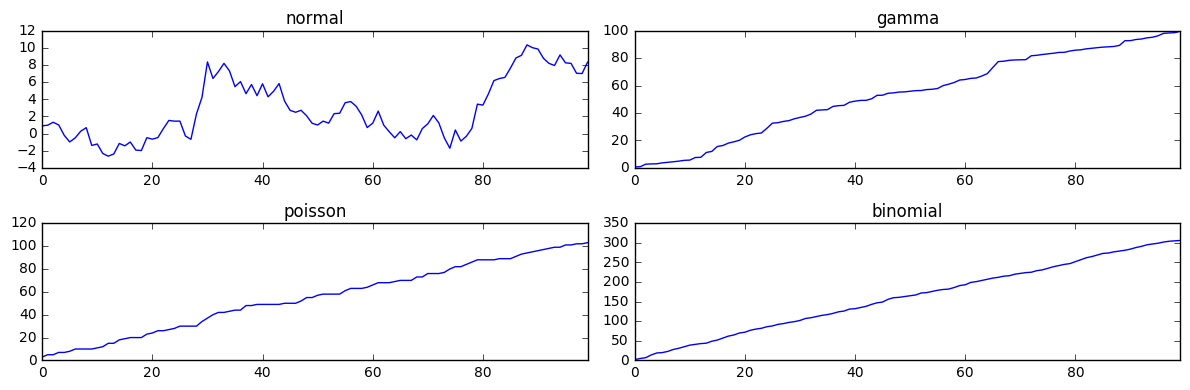

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))
variables['normal'].cumsum(0).plot(ax=axes[0,0], title="normal")
variables['gamma'].cumsum(0).plot(ax=axes[0,1], title="gamma")
variables['poisson'].cumsum(0).plot(ax=axes[1,0], title="poisson")
variables['binomial'].cumsum(0).plot(ax=axes[1,1], title="binomial")
fig.tight_layout()



## Bar plots

条形图通常用来显示或者比较数值，比如个数，数量。pandas里面利用`kind='bar'`参数绘制条形图 

In [56]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


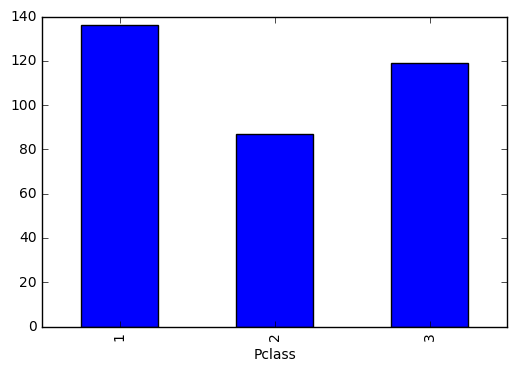

In [15]:
titanic.groupby('Pclass').Survived.sum().plot(kind='bar')

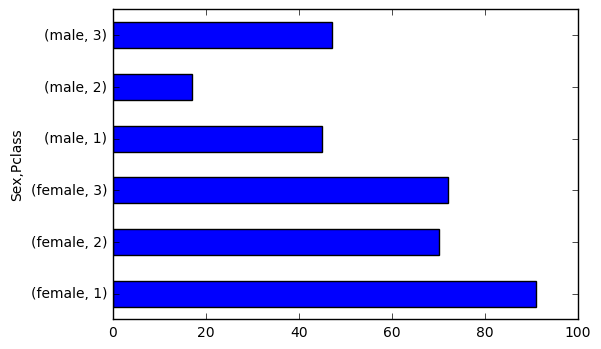

In [16]:
titanic.groupby(['Sex','Pclass']).Survived.sum().plot(kind='barh')

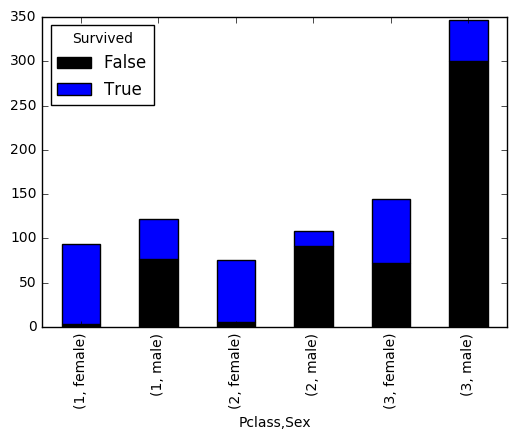

In [53]:
death_counts = pd.crosstab([titanic.Pclass, titanic.Sex], titanic.Survived.astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','blue'], grid=False)

In [57]:
death_counts

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      300     47

In [61]:
pd.crosstab?

比例条形图

In [62]:
death_counts.div?

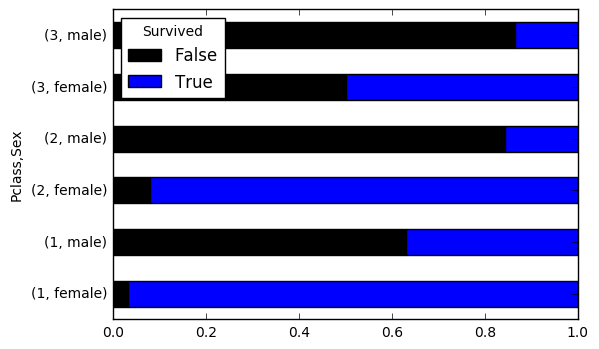

In [54]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','blue'])

## 直方图

直方图用于频率分布，y轴表示频率分布（数值或者比率）

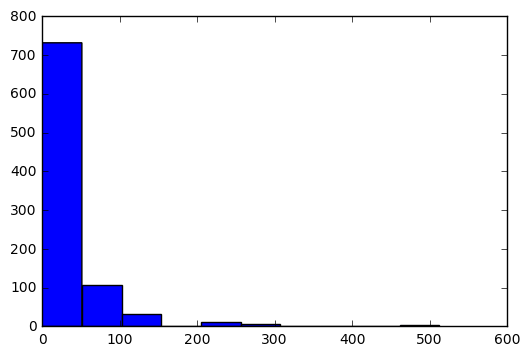

In [74]:
titanic.Fare.hist(grid=False)

`hist` 函数把连续的fare值分成**bins**, 缺省为10

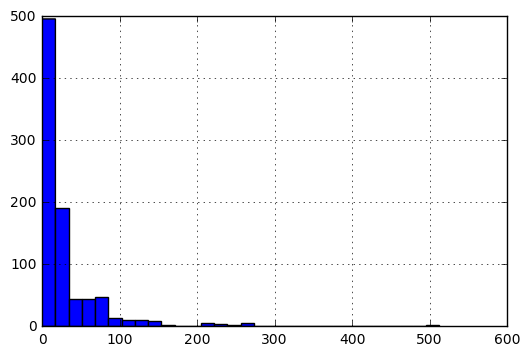

In [75]:
titanic.Fare.hist(bins=30)

**density plot** 是对真实密度的估计，我们用`kind='kde'`, kde` = **kernel density estimate**.

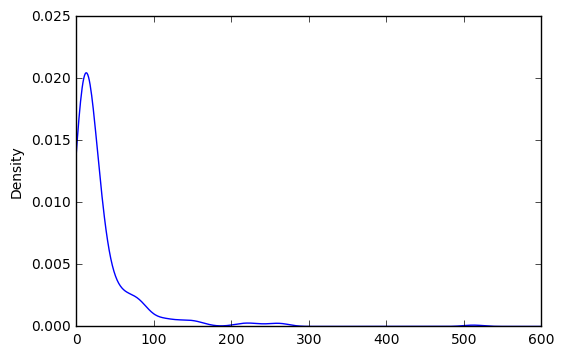

In [76]:
titanic.Fare.dropna().plot(kind='kde', xlim=(0,600))

同时显示

**Boxplot**

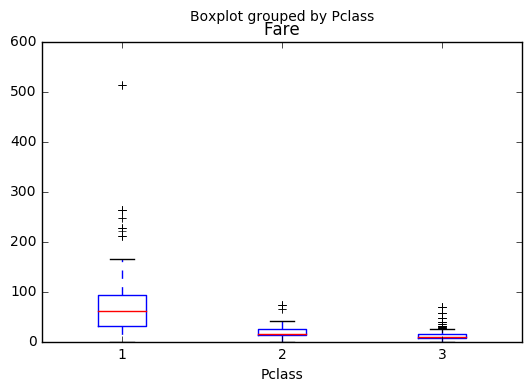

In [28]:
titanic.boxplot(column='Fare', by='Pclass', grid=False)

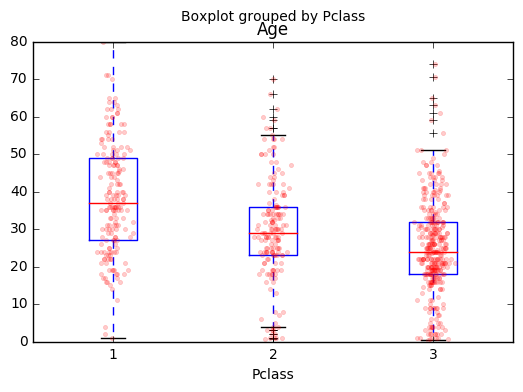

In [30]:
bp = titanic.boxplot(column='Age', by='Pclass', grid=False)
for i in [1,2,3]:
    y = titanic.Age[titanic.Pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)

In [77]:
 np.random.normal?

如果数据量很大，可以考虑

1. 减小alpha,让点透明
2. 使用"jitter" 避免重叠

## Scatterplots

In [78]:
baseball = pd.read_csv("../data/baseball.csv")
baseball.head()

,id,player,year,stint,team,...,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,...,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,...,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,...,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,...,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,...,0.0,0.0,0.0,0.0,0.0


(0, 200)

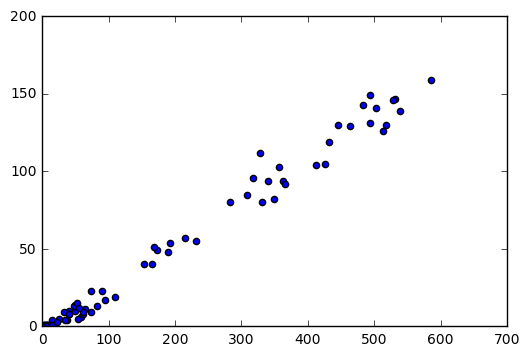

In [79]:
plt.scatter(baseball.ab, baseball.h)
plt.xlim(0, 700); plt.ylim(0, 200)

(0, 200)

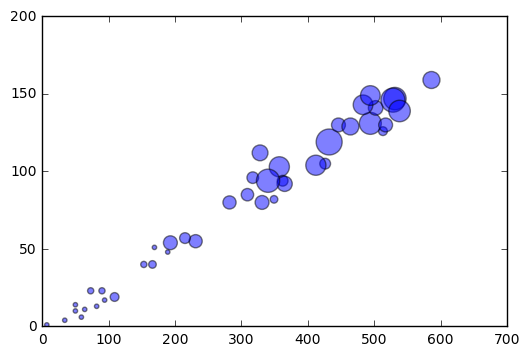

In [80]:
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)
plt.xlim(0, 700); plt.ylim(0, 200)

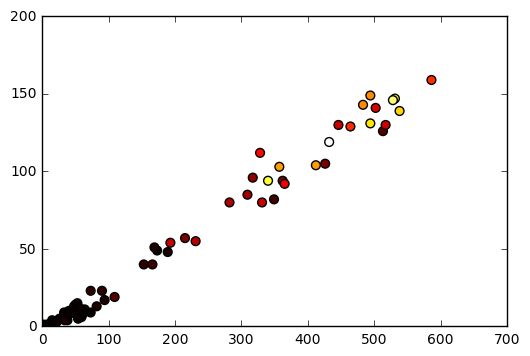

In [82]:
plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')
plt.xlim(0, 700); plt.ylim(0, 200);

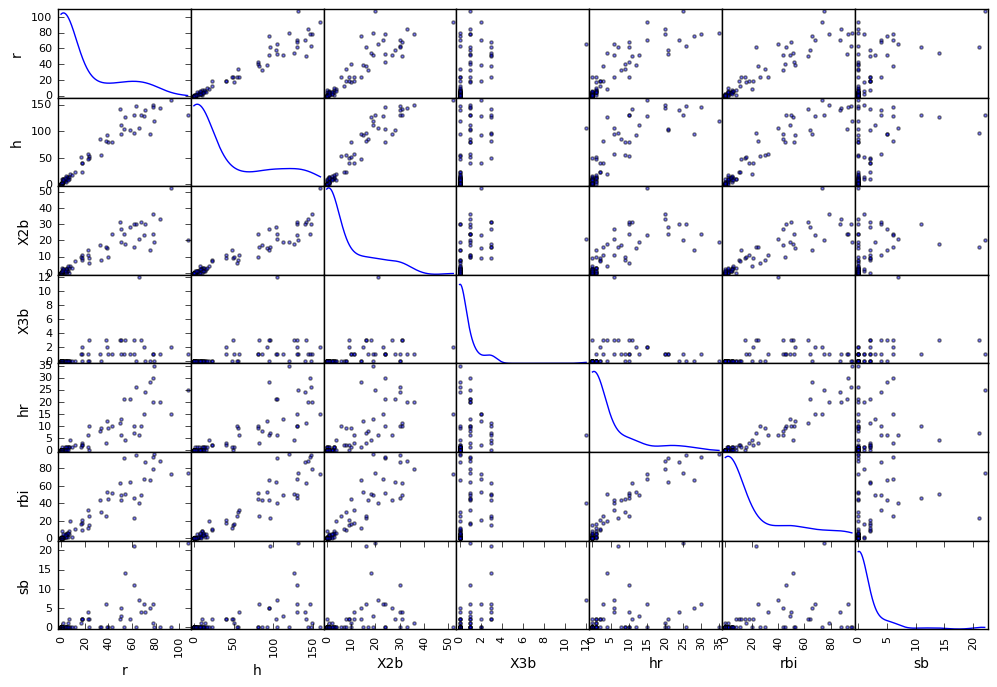

In [73]:
_ = pd.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(12,8), diagonal='kde')